In [0]:
#Importing all required libraries.

import numpy as np  
import pandas as pd
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive

drive.mount('/content/gdrive') #Mounting our google drive on collab to directly use the dataset which we have manually uploaded to our google drive.

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
directory = 'gdrive/My Drive/Colab Notebooks'

In [4]:
%cd 'gdrive/My Drive/Colab Notebooks'

/content/gdrive/My Drive/Colab Notebooks


In [0]:
#Loading in our dataset
training_df = pd.read_csv('sign_mnist_train.csv')
testing_df  = pd.read_csv('sign_mnist_test.csv') 
training_df

In [0]:
training_df = training_df.values #Converting the pandas dataframe into numpy array

In [10]:
training_df '''The images available in the dataset are 28x28 pixels. The dataset itself contains 27544 examples with each example having 784 features(28x28 = 784) and a label
column to denote which class it belongs to.'''


array([[  3, 107, 118, ..., 204, 203, 202],
       [  6, 155, 157, ..., 103, 135, 149],
       [  2, 187, 188, ..., 195, 194, 195],
       ...,
       [ 18, 174, 174, ..., 202, 200, 200],
       [ 17, 177, 181, ...,  64,  87,  93],
       [ 23, 179, 180, ..., 205, 209, 215]])

In [0]:
x_training = training_df[: , 1:]
y_training = training_df[: , 0] #Splitting the training numpy array into training_data and training_labels (our target values)


In [12]:
x_training

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [13]:
y_training #The labels in our dataset are different categories which have been assigned to each letter.
np.unique(y_training)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [14]:
y_training.shape #To check we have all the available labels

(27455,)

In [0]:
import matplotlib.pyplot as plt 

In [16]:
x_training[0].shape

(784,)

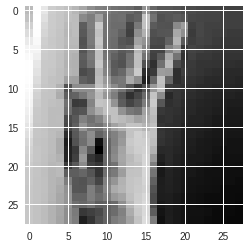

In [143]:
plt.figure(figsize=(4,4))
plt.imshow(x_training[7].reshape(28,28)) #Visualizing the first image available in our training dataset



In [20]:
x_training.shape

(27455, 784)

In [23]:
y_training.shape

(27455,)

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
#Labelising the given labels as binary. So each class will have a unique numpy array of 0s and 1s
label_binarizer = LabelBinarizer() 
y_training = label_binarizer.fit_transform(y_training)

In [144]:
y_training[7] #This particular example correspongs to the 22nd class which is letter X in the dataset

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [0]:
x_training = x_training/255 #Normalizing the data

In [28]:
'''Our CNN will be accepting the inputs in (28x28x1) shape where 1 represents the 1 grayscale channel.Hence in this step we are reshaping all of the images to 28x28 
so that these can be later fed into the network.'''


x_training = np.array([np.reshape(i , (28,28,1)) for i in x_training])
x_training.shape

(27455, 28, 28, 1)

In [0]:
x_training 

In [0]:
model = keras.Sequential([
    
    #LAYER 1
    keras.layers.Conv2D(64 , kernel_size = (3,3) , activation='relu' , input_shape = (28,28,1)),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    #LAYER 2
    keras.layers.Conv2D(64 , kernel_size = (3,3) , activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    #LAYER 3
    keras.layers.Conv2D(64 , kernel_size = (3,3) , activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    keras.layers.Flatten(),
    #LAYER 4
    keras.layers.Dense(128 , activation='relu'),
    keras.layers.Dropout(0.20), #DropOut layer to prevent overfitting with 20% ratio
    #LAYER 5
    keras.layers.Dense(24 , activation='softmax') #Using softmax activation function because we have multiple classes to predict.
    
    
    
])

In [0]:
model.compile(loss = ['categorical_crossentropy'] , 
              optimizer = tf.train.AdamOptimizer(), 
              metrics = ['accuracy']
             )


In [34]:
history = model.fit(x_training , y_training , validation_split=0.2 , epochs = 50 , batch_size= 128) #While training the model we will use 20% of the training data for cross-validation.As you can see below we achieved very high accuracies for both the training and validation data.

Train on 21964 samples, validate on 5491 samples
Epoch 1/50
21964/21964 [==============================] - 4s 184us/step - loss: 2.7110 - acc: 0.1694 - val_loss: 1.8209 - val_acc: 0.4098
Epoch 2/50
21964/21964 [==============================] - 2s 103us/step - loss: 1.4939 - acc: 0.4999 - val_loss: 0.9421 - val_acc: 0.7115
Epoch 3/50
21964/21964 [==============================] - 2s 104us/step - loss: 0.8667 - acc: 0.7076 - val_loss: 0.6103 - val_acc: 0.8062
Epoch 4/50
21964/21964 [==============================] - 2s 104us/step - loss: 0.5674 - acc: 0.8101 - val_loss: 0.3439 - val_acc: 0.9007
Epoch 5/50
21964/21964 [==============================] - 2s 104us/step - loss: 0.3828 - acc: 0.8750 - val_loss: 0.2270 - val_acc: 0.9368
Epoch 6/50
21964/21964 [==============================] - 2s 103us/step - loss: 0.2637 - acc: 0.9158 - val_loss: 0.1475 - val_acc: 0.9581
Epoch 7/50
21964/21964 [==============================] - 2s 104us/step - loss: 0.1969 - acc: 0.9370 - val_loss: 0.1069 - v

In [46]:
testing_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [0]:
testing_df = testing_df.values #Converting the pandas dataframe into numpy arrays.

In [0]:
x_test = training_df[: , 1:]
y_test = training_df[: , 0]

In [0]:
label_binarizer = LabelBinarizer()
y_test = label_binarizer.fit_transform(y_test)

In [50]:
x_test[0].shape

(784,)

In [0]:
x_test = np.array([np.reshape(i , (28,28,1)) for i in x_test])
x_test

In [53]:
x_test.shape

(27455, 28, 28, 1)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
y_predicitions = model.predict(x_test) #Prediction on to the test set


In [57]:
accuracy_score(y_test , y_predicitions.round()) #Finally we achieved a testing accuracy of about 97.9% on the test set.

0.9795301402294664

In [58]:
#Downloading our model to be used in the opencv module.

from keras.models import model_from_json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk") 

Saved model to disk


Using TensorFlow backend.


In [0]:
from google.colab import files
files.download('model.h5')#Downloading the weights of our trained model
files.download('model.json')

In [111]:
model.summary() #A final summary of the model.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
__________